# Group 06 : Impact of Covid-19 on Crimes


Team : 

1) Sumati Bele

2) Rucha Visal

3) Dhvani Patel


In [4]:
# Importing all required libraries
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

import math
from numpy import mean
from numpy import array
from prettytable import PrettyTable
from tqdm import tqdm_notebook

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D



In [5]:
#Loading the dataset from drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset

In [6]:
# Read Chicago Crime dataset
data2 =  pd.read_csv("drive/My Drive/Crimes_dataset.csv")

In [7]:
data = data2
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [8]:
# Set date as index
data.index = pd.DatetimeIndex(data.Date)
data=data.sort_index()

In [9]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7427119 entries, 2001-01-01 00:00:00 to 2021-10-22 23:56:00
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2

## **Removing the columns after analysis of their content, which are not useful further.**

In [10]:
# Drop columns which are not related
crimes = data.drop(columns=['Ward', 'Community Area','Location','Block','Domestic','Beat','Updated On','IUCR','FBI Code','ID','Location Description','Description'])

In [11]:
crimes.head()

,Case Number,Date,Primary Type,Arrest,District,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Date,,,,,,,,,,
2001-01-01,G061760,01/01/2001 12:00:00 AM,DECEPTIVE PRACTICE,False,17.0,1148516.0,1941445.0,2001,41.995267,-87.729044
2001-01-01,G001704,01/01/2001 12:00:00 AM,THEFT,False,1.0,1176294.0,1902094.0,2001,41.886704,-87.628054
2001-01-01,G011348,01/01/2001 12:00:00 AM,THEFT,False,5.0,1178560.0,1822349.0,2001,41.667824,-87.622155
2001-01-01,HN559680,01/01/2001 12:00:00 AM,THEFT,False,1.0,1172495.0,1900252.0,2001,41.881734,-87.642060
2001-01-01,HN555375,01/01/2001 12:00:00 AM,OFFENSE INVOLVING CHILDREN,True,10.0,1154179.0,1893294.0,2001,41.863026,-87.709501


In [12]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7427119 entries, 2001-01-01 00:00:00 to 2021-10-22 23:56:00
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Case Number   object 
 1   Date          object 
 2   Primary Type  object 
 3   Arrest        bool   
 4   District      float64
 5   X Coordinate  float64
 6   Y Coordinate  float64
 7   Year          int64  
 8   Latitude      float64
 9   Longitude     float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 573.7+ MB


### **Checking for Null Values**

Check for null values and drop the missing values.

In [13]:
crimes.isnull().sum()

Case Number         4
Date                0
Primary Type        0
Arrest              0
District           47
X Coordinate    74547
Y Coordinate    74547
Year                0
Latitude        74547
Longitude       74547
dtype: int64

In [14]:
crimes.dropna()

,Case Number,Date,Primary Type,Arrest,District,X Coordinate,Y Coordinate,Year,Latitude,Longitude
Date,,,,,,,,,,
2001-01-01 00:00:00,G061760,01/01/2001 12:00:00 AM,DECEPTIVE PRACTICE,False,17.0,1148516.0,1941445.0,2001,41.995267,-87.729044
2001-01-01 00:00:00,G001704,01/01/2001 12:00:00 AM,THEFT,False,1.0,1176294.0,1902094.0,2001,41.886704,-87.628054
2001-01-01 00:00:00,G011348,01/01/2001 12:00:00 AM,THEFT,False,5.0,1178560.0,1822349.0,2001,41.667824,-87.622155
2001-01-01 00:00:00,HN559680,01/01/2001 12:00:00 AM,THEFT,False,1.0,1172495.0,1900252.0,2001,41.881734,-87.642060
2001-01-01 00:00:00,HN555375,01/01/2001 12:00:00 AM,OFFENSE INVOLVING CHILDREN,True,10.0,1154179.0,1893294.0,2001,41.863026,-87.709501
...,...,...,...,...,...,...,...,...,...,...
2021-10-22 23:45:00,JE419254,10/22/2021 11:45:00 PM,THEFT,False,3.0,1177962.0,1857593.0,2021,41.764552,-87.623280
2021-10-22 23:45:00,JE419250,10/22/2021 11:45:00 PM,BATTERY,False,3.0,1180025.0,1862499.0,2021,41.777967,-87.615568
2021-10-22 23:51:00,JE419255,10/22/2021 11:51:00 PM,WEAPONS VIOLATION,True,18.0,1174026.0,1904720.0,2021,41.893961,-87.636305


# **Data** **Processing**

There are 36 criminal types mentioned in the dataset. Upon further analysis and study of various criminal activities, we could further narrow down most of the activities under specific categories. Some criminal types had multiple labels for the same type (e.g. Crim Sexual Assault, Criminal Sexual Assault). We have excluded certain criminal activities which had a very negligible count of data and could not be classified down to a particular class of criminal activity.

Following are the codes assigned with the criminal activities they include :

* BugRob: includes types Burglary and Robbery.

* AsCrime: includes types Assault, Crim Sexual Assault, Criminal Sexual Assault, Sex Offence,   Offence Involving Children, Battery.

* PubViolation: includes types Public Peace Violation, Interference with the officer.

* ThefM: includes types Theft, Motor Vehicle Theft 

* Gambar : includes types Gambling, Narcotics, Other Narcotics, Liquor law violation

* Homicide: includes only Homicide crime type.

We will be **renaming** the Primary types of criminal activities to the above codes that fall under the particular code assigned for the set of those similar criminal activities.

In [15]:
crimes['Primary Type'].replace(['BURGLARY','ROBBERY'],'BugRob',inplace=True)

In [16]:
crimes['Primary Type'].replace(['CRIMINAL SEXUAL ASSAULT','CRIM SEXUAL ASSAULT','SEX OFFENCE','OFFENCE INVOLVING CHILDREN','BATTERY'],'AsCrime',inplace=True)

In [17]:
crimes['Primary Type'].replace(['PUBLIC PEACE VIOLATION','INTERFERENCE WITH OFFICER'],'PubViolation',inplace=True)

In [18]:
crimes['Primary Type'].replace(['THEFT','MOTOR VEHICLE THEFT'],'ThefM',inplace=True)

In [19]:
crimes['Primary Type'].replace(['GAMBLING','OTHER NARCOTIC VIOLATION','NARCOTICS','LIQUOR LAW VIOLATION'],'GamNar',inplace=True)

In [20]:
crimes = crimes[crimes['Primary Type'].isin(['AsCrime', 'ThefM', 'GamNar','BugRob','WEAPONS VIOLATION','PubViolation','HOMICIDE'])]

In [21]:
crimes['Primary Type'].unique()

array(['ThefM', 'AsCrime', 'BugRob', 'WEAPONS VIOLATION', 'GamNar',
       'PubViolation', 'HOMICIDE'], dtype=object)

In [22]:
c = crimes[['District','Primary Type']]
x = c.groupby(['District']).count()
d = x.sort_values('Primary Type',ascending=False)
print(d)
dist_list = list(d.index[:2])


          Primary Type
District              
11.0            349699
8.0             316341
7.0             295433
6.0             287237
25.0            277318
4.0             267664
12.0            245961
3.0             243994
9.0             237671
2.0             232162
15.0            231594
18.0            227586
19.0            221466
10.0            220440
5.0             211561
1.0             197758
14.0            196764
22.0            152065
24.0            141641
16.0            140263
17.0            138752
20.0             82889
31.0               117
21.0                 4


In [23]:
print('Current rows:', crimes.shape[0])
crimes = crimes[(((crimes.Latitude >= 41.64) & (crimes.Longitude <= -87.50)) |
           ((crimes.Latitude <= 41.94) & (crimes.Longitude >= -87.94)))]
print('Rows after removing out of box points:', crimes.shape[0])



#removing rows with mismatch in year
print('Current rows:', crimes.shape[0])
crimes = crimes[crimes.index.year == crimes.Year]
print('Rows after removing mismatch:', crimes.shape[0])


#we'll create some new columns like month, dayOfWeek, dayOfMonth, weekOfMonth(wom)
crimes['Month'] = crimes.index.month
crimes['dayOfWeek'] = crimes.index.dayofweek
crimes['dayOfMonth'] = crimes.index.day
crimes['dayOfYear'] = crimes.index.dayofyear
crimes['weekOfMonth'] = crimes.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)
 
dayOfYear = list(crimes.index.dayofyear)
 
weekOfYear = [math.ceil(i/7) for i in dayOfYear]
crimes['weekOfYear'] = weekOfYear


#de-duplication of crimes
print('Current rows:', crimes.shape[0])
crimes.drop_duplicates(subset=['Case Number'], inplace=True)
print('Rows after deduplication:', crimes.shape[0])


Current rows: 4916407
Rows after removing out of box points: 4872797
Current rows: 4872797
Rows after removing mismatch: 4872797
Current rows: 4872797
Rows after deduplication: 4872314


In [24]:
# Splitting data into size of 3 for better processing while plotting the data.
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#District wise prediction for Pandemic

In [25]:
# Training data set from Jan 2019 to Dec 2020
data_tr = crimes.loc['2019-01-01':'2020-12-31']

# Testing data set from Jan 2021 to Dec 2021
data_test = crimes.loc['2021-01-01':'2021-12-31']

In [26]:
crime_type = list(crimes['Primary Type'].unique())

In [27]:
# Number of crimes in the training dataset
train_d_crimes = []
for cr in crime_type:
    df = data_tr[(data_tr['District'] == dist_list[1]) & (data_tr['Primary Type'] == cr)]
    df_gr = df.groupby(['Year', 'Month','Primary Type']).count()
    train_d_crimes.append(list(df_gr['Date'].values))

In [29]:
# Number of crimes in the testing dataset
test_d_crimes = []
for cr in crime_type:
    df = data_test[(data_test['District'] == dist_list[1]) & (data_test['Primary Type'] == cr)]
    df_gr = df.groupby(['Year', 'Month','Primary Type']).count()
    test_d_crimes.append(list(df_gr['Date'].values))

#1-layer LSTM based approach for predicting Pandemic data

District 1


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: ThefM


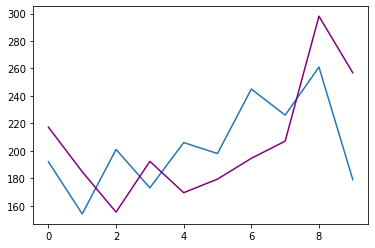

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: AsCrime


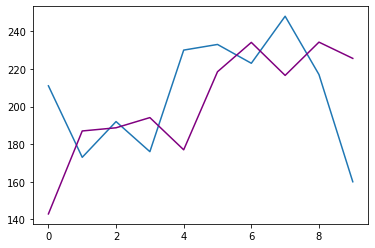

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: BugRob


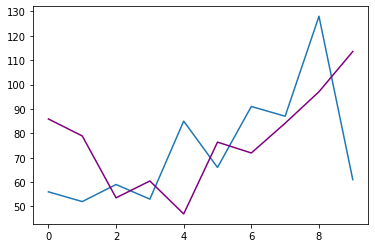

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: WEAPONS VIOLATION


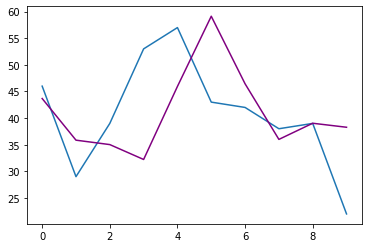

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: GamNar


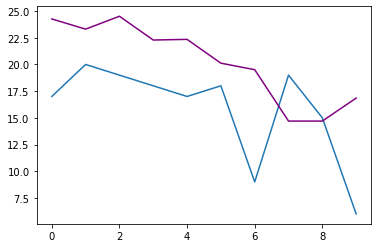

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: PubViolation


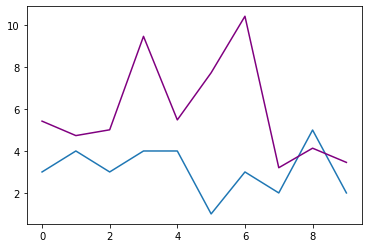

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: HOMICIDE


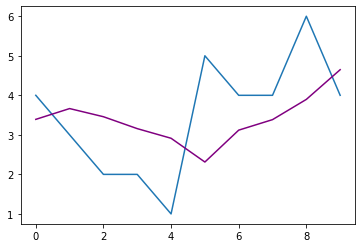

Test RMSE: 23.620


In [30]:
## Comparing the actual and the predicted values using our LSTM model for District 1

# prepare situation
window = 3
predTot = list()
testTot = list()

# walk forward over time steps in test
print('District 1')
for distNum in tqdm_notebook(range(len(train_d_crimes))):
    
    history = train_d_crimes[distNum]
    test = test_d_crimes[distNum]
    preds = []
    for t in tqdm_notebook(range(len(test)), leave=False):
        
        length = len(history)
        
        # split into samples
        X, y = split_sequence(history, window)
        
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(window, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        
        X_test = array([history[i] for i in range(length-window, length)])
        X_test = X_test.reshape((1, window, n_features))
        yhat = model.predict(X_test, verbose=0)
        
        obs = test[t]
        preds.append(yhat.reshape((1,)))
        history.append(obs)
        
    # plot
    print('Crime Type: {}'.format(crime_type[distNum]))
    plt.plot(test)
    plt.plot(preds, color='purple')
    plt.show()
    
    testTot = testTot + test
    predTot = predTot + preds
error = mean_squared_error(predTot, testTot) ** .5
print('Test RMSE: %.3f' % error)

In [32]:
# Number of crimes in the training dataset
train_d_crimes = []
for cr in crime_type:
    df = data_tr[(data_tr['District'] == dist_list[0]) & (data_tr['Primary Type'] == cr)]
    df_gr = df.groupby(['Year', 'Month','Primary Type']).count()
    train_d_crimes.append(list(df_gr['Date'].values))

In [33]:
# Number of crimes in the testing dataset
test_d_crimes = []
for cr in crime_type:
    df = data_test[(data_test['District'] == dist_list[0]) & (data_test['Primary Type'] == cr)]
    df_gr = df.groupby(['Year', 'Month','Primary Type']).count()
    test_d_crimes.append(list(df_gr['Date'].values))

District 2


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: ThefM


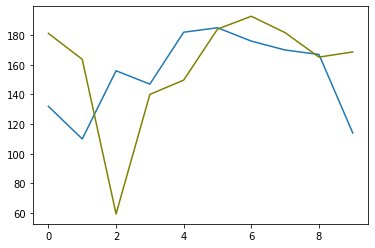

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: AsCrime


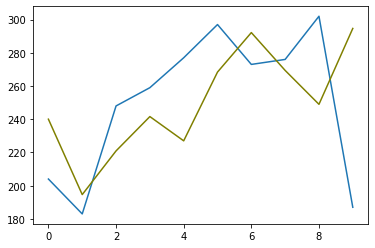

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: BugRob


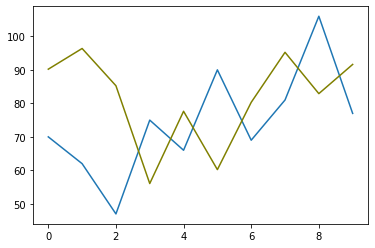

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: WEAPONS VIOLATION


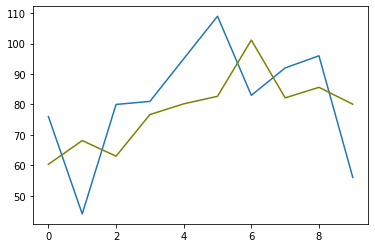

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: GamNar


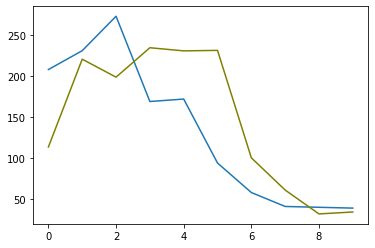

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: PubViolation


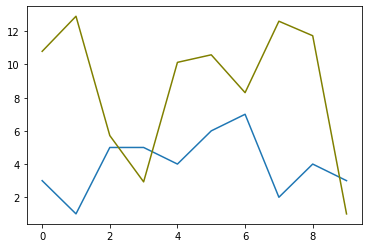

  0%|          | 0/10 [00:00<?, ?it/s]

Crime Type: HOMICIDE


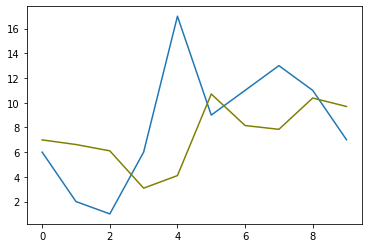

Test RMSE: 36.367


In [34]:
## Comparing the actual and the predicted values using our LSTM model for District 2

# prepare situation
window = 3
predTot = list()
testTot = list()

# walk forward over time steps in test
print('District 2')
for distNum in tqdm_notebook(range(len(train_d_crimes))):
    
    history = train_d_crimes[distNum]
    test = test_d_crimes[distNum]
    preds = []
    for t in tqdm_notebook(range(len(test)), leave=False):
        
        length = len(history)
        
        # split into samples
        X, y = split_sequence(history, window)
        
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(window, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        
        X_test = array([history[i] for i in range(length-window, length)])
        X_test = X_test.reshape((1, window, n_features))
        yhat = model.predict(X_test, verbose=0)
        
        obs = test[t]
        preds.append(yhat.reshape((1,)))
        history.append(obs)
        
    # plot
    print('Crime Type: {}'.format(crime_type[distNum]))
    plt.plot(test)
    plt.plot(preds, color='olive')
    plt.show()
    
    testTot = testTot + test
    predTot = predTot + preds
error = mean_squared_error(predTot, testTot) ** .5
print('Test RMSE: %.3f' % error)